In [3]:
!pwd
!ls

/content
sample_data


In [4]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [5]:
!ls "/content/gdrive/MyDrive/Dataset"

X_test.csv  X_train.csv  y_test.csv  y_train.csv


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from google.colab import data_table
import math

In [8]:
#Datasets are pulled from google drive and dataframes are constructed
dataset_dir = '/content/gdrive/MyDrive/Dataset'
csv_path_x_test = os.path.join(dataset_dir, 'X_test.csv')
csv_path_y_test = os.path.join(dataset_dir, 'y_test.csv')
csv_path_x_train = os.path.join(dataset_dir, 'X_train.csv')
csv_path_y_train = os.path.join(dataset_dir, 'y_train.csv')
df_x_test = pd.read_csv(csv_path_x_test, header=0, delimiter=" ")
df_y_test = pd.read_csv(csv_path_y_test, header=None)
df_x_train = pd.read_csv(csv_path_x_train, header=0,delimiter=" ")
df_y_train = pd.read_csv(csv_path_y_train, header=None)
x_test = df_x_test.values
y_test = df_y_test.values
x_train = df_x_train.values
y_train = df_y_train.values

# Question 3.1


1.


In [9]:
def y_valuedist(data):
  #the function takes a label dataframe and returns the label (y value) distribution array
  class_zero_num = 0
  class_one_num = 0
  class_two_num = 0
  class_three_num = 0
  class_four_num = 0
  for i in data:
    if i[0] == 0:
      class_zero_num +=1
    elif i[0] == 1:
      class_one_num +=1
    elif i[0] == 2:
      class_two_num +=1
    elif i[0] == 3:
      class_three_num +=1
    elif i[0] == 4:
      class_four_num +=1
  return np.array([class_zero_num,class_one_num,class_two_num,class_three_num,class_four_num])

In [10]:
y_test_dist = y_valuedist(y_test)
y_test_dist


array([135, 102,  98, 134,  88])

In [11]:
y_train_dist = y_valuedist(y_train)
y_train_dist

array([375, 284, 319, 377, 313])

Find percentage values for y_test and y_train dataset;


In [12]:
y_test_perc = y_test_dist/y_test_dist.sum()*100
y_test_perc

array([24.23698384, 18.31238779, 17.59425494, 24.05745063, 15.7989228 ])

In [13]:
y_train_perc = y_train_dist/y_train_dist.sum()*100
y_train_perc

array([22.48201439, 17.0263789 , 19.12470024, 22.60191847, 18.76498801])

Show them on the table;


In [14]:
y_test_row = np.concatenate((np.array(["y_test"]),y_test_perc),axis=0)
y_train_row = np.concatenate((np.array(["y_train"]),y_train_perc),axis=0)
table = np.vstack((y_test_row,y_train_row))
heading = ["dataset","0","1","2","3","4"]
print(tabulate(table,heading, tablefmt="fancy_grid"))

╒═══════════╤════════╤═════════╤═════════╤═════════╤═════════╕
│ dataset   │      0 │       1 │       2 │       3 │       4 │
╞═══════════╪════════╪═════════╪═════════╪═════════╪═════════╡
│ y_test    │ 24.237 │ 18.3124 │ 17.5943 │ 24.0575 │ 15.7989 │
├───────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ y_train   │ 22.482 │ 17.0264 │ 19.1247 │ 22.6019 │ 18.765  │
╘═══════════╧════════╧═════════╧═════════╧═════════╧═════════╛


Draw a pie chart;


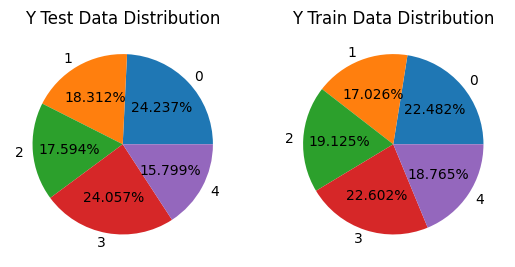

In [15]:
value1 = y_test_perc
label1 = ["0","1","2","3","4"]
value2 = y_train_perc
label2 = ["0","1","2","3","4"]
# Pie chart
plt.subplot(1,2,1)
plt.title("Y Test Data Distribution")
plt.pie(value1, labels = label1, autopct = '%1.3f%%')
plt.subplot(1,2,2)
plt.title("Y Train Data Distribution")
plt.pie(value2, labels = label2, autopct = '%1.3f%%')
plt.show()

2.

The prior probabilities are as following;


In [16]:
y_train_row = np.concatenate((np.array(["y_train"]),y_train_perc),axis=0)
table = [y_train_row,]
heading = ["dataset","0","1","2","3","4"]
print(tabulate(table,heading, tablefmt="fancy_grid"))

╒═══════════╤════════╤═════════╤═════════╤═════════╤════════╕
│ dataset   │      0 │       1 │       2 │       3 │      4 │
╞═══════════╪════════╪═════════╪═════════╪═════════╪════════╡
│ y_train   │ 22.482 │ 17.0264 │ 19.1247 │ 22.6019 │ 18.765 │
╘═══════════╧════════╧═════════╧═════════╧═════════╧════════╛


Because, prior probability is an estimate for the class probability from the training set (i.e., (prior for a given class) = (number of samples in the class) / (total number of samples)).

3.

In my opinion, our trainig set does not seem skewed in both test and data set. Because they are distributed around 20% which is the average number in a 5 class model.

Having an unbalanced dataset would create a lot of problem when modeling. Firstly, having lesser training data means that this label is not taught to the model sufficiently. Secondly, because the distribution of training dataset affects our prior probability, while doing a-posteriori estimation, it will affect the result of estimation.

4.

According to the question, log probabilities are asked:

Let's start with finding an array of label document(y_train) having 1 if label is tech and 0 if not.

In [17]:
tech_array = y_train == np.full((1668,1),4)

In [18]:
df_x_train[tech_array]["alien"]

0       0
10      0
11      0
25      0
27      0
       ..
1634    0
1635    0
1646    0
1663    0
1665    0
Name: alien, Length: 313, dtype: int64

In [19]:
df_x_train[tech_array]["thunder"]

0       0
10      0
11      0
25      0
27      0
       ..
1634    0
1635    0
1646    0
1663    0
1665    0
Name: thunder, Length: 313, dtype: int64

In [20]:
sum(df_x_train[tech_array]["alien"])

3

In [21]:
sum(df_x_train[tech_array]["thunder"])

0

The "alien" log ratio is;

In [22]:
math.log((sum(df_x_train[tech_array]["alien"])*sum(np.sum(df_x_train[tech_array])))/0.18765)

14.041789078213778

The "thunder" log ratio is;

In [23]:
try:
  math.log((sum(df_x_train[tech_array]["thunder"])*sum(np.sum(df_x_train[tech_array])))/0.18765)
except:
  print(-1e+12)


-1000000000000.0


In [24]:
sum(np.sum(df_x_train[tech_array]))

78433

Then Log ratio of alien;

In [25]:
len(df_x_train[tech_array])

313

In [26]:
len(df_x_train)

1668

As it was found earlier it is %18.765

# Question 3.2

By using the pieces of information indicated at the end of the question 3.1, we can construct a Multinomial Bayes Model.In this question, I will not use smoothing operator.

Starting with prior probability of documentation type

In [27]:
def calc_prior(label):
  # Calculate prior of the given label
  # gets Y and label as params, returns the prior
    size = df_y_train.size
    if label == 0:
      return np.count_nonzero(df_y_train==0)/size
    elif label == 1:
      return np.count_nonzero(df_y_train==1)/size
    elif label == 2:
      return np.count_nonzero(df_y_train==2)/size
    elif label == 3:
      return np.count_nonzero(df_y_train==3)/size
    else:
      return np.count_nonzero(df_y_train==4)/size

Going on with the likelihood calculation;

In [28]:
def calc_likelihood(xtrain,ytrain):
    #the function finds the likelihood probability estimators of multinomial and bernoulli with given dataset (features and labels)

    #these are lists of the sums of every word given the label.
    zero_wordsums = [] #index zero gives the total number of "ad" occurences in files labeled zero
    one_wordsums = []
    two_wordsums = []
    three_wordsums = []
    four_wordsums = []
    #these are the sums of every word in given label.
    zero_totalsum = 0 #index zero gives the sum of all words in files labeled zero
    one_totalsum = 0
    two_totalsum = 0
    three_totalsum = 0
    four_totalsum = 0
    #count of occurences other than zero in given label
    zero_bernoulli = [] #index zero gives the occurences of "ad" word in files labeled zero
    one_bernoulli = []
    two_bernoulli = []
    three_bernoulli = []
    four_bernoulli =  []

    data = xtrain.copy()
    data["filelabel"] = y_train
    lab_zero = data[data["filelabel"]==0].values.transpose()[:-1]
    lab_one = data[data["filelabel"]==1].values.transpose()[:-1]
    lab_two = data[data["filelabel"]==2].values.transpose()[:-1]
    lab_three = data[data["filelabel"]==3].values.transpose()[:-1]
    lab_four = data[data["filelabel"]==4].values.transpose()[:-1]

    for word in lab_zero:
        total = word.sum()
        zero_wordsums.append(total)
        zero_totalsum += total
        zero_bernoulli.append(np.count_nonzero(word))
    for word in lab_one:
        total = word.sum()
        one_wordsums.append(total)
        one_totalsum += total
        one_bernoulli.append(np.count_nonzero(word))
    for word in lab_two:
        total = word.sum()
        two_wordsums.append(total)
        two_totalsum += total
        two_bernoulli.append(np.count_nonzero(word))
    for word in lab_three:
        total = word.sum()
        three_wordsums.append(total)
        three_totalsum += total
        three_bernoulli.append(np.count_nonzero(word))
    for word in lab_four:
        total = word.sum()
        four_wordsums.append(total)
        four_totalsum += total
        four_bernoulli.append(np.count_nonzero(word))

    return zero_wordsums, one_wordsums, two_wordsums, three_wordsums, four_wordsums, zero_totalsum, one_totalsum, two_totalsum, three_totalsum, four_totalsum,zero_bernoulli, one_bernoulli, two_bernoulli, three_bernoulli, four_bernoulli
zero_wordsums, one_wordsums, two_wordsums, three_wordsums, four_wordsums, zero_totalsum, one_totalsum, two_totalsum, three_totalsum, four_totalsum,zero_bernoulli, one_bernoulli, two_bernoulli, three_bernoulli, four_bernoulli = calc_likelihood(df_x_train,df_y_train)


Let's predict by using the estimators that we created;

In [29]:
def predict(test_df):
    #this function takes a test dataframe and calcules determinator matrix for every test row. And makes the labeling according to the maximum value in this matrix.
    #ie.([0.2,0.1,0.5,0.7,0.12] --> the row that creates this is labeled as 3).
    #result storages the predictions for every row and returned
    result = []
    for instance in test_df.values:
        determinator_matrix = [0, 0, 0, 0, 0]

        for i in range(len(determinator_matrix)):
            determinator_matrix[i] = math.log(calc_prior(i))

        zero_predictor_matrix = np.log(np.divide(zero_wordsums, zero_totalsum))
        one_predictor_matrix = np.log(np.divide(one_wordsums, one_totalsum))
        two_predictor_matrix = np.log(np.divide(two_wordsums, two_totalsum))
        three_predictor_matrix = np.log(np.divide(three_wordsums, three_totalsum))
        four_predictor_matrix = np.log(np.divide(four_wordsums, four_totalsum))

        zero_predictor_matrix[np.isneginf(zero_predictor_matrix)] = -1e+12
        one_predictor_matrix[np.isneginf(one_predictor_matrix)] = -1e+12
        two_predictor_matrix[np.isneginf(two_predictor_matrix)] = -1e+12
        three_predictor_matrix[np.isneginf(three_predictor_matrix)] = -1e+12
        four_predictor_matrix[np.isneginf(four_predictor_matrix)] = -1e+12

        determinator_matrix[0] += np.sum(instance * zero_predictor_matrix)
        determinator_matrix[1] += np.sum(instance * one_predictor_matrix)
        determinator_matrix[2] += np.sum(instance * two_predictor_matrix)
        determinator_matrix[3] += np.sum(instance * three_predictor_matrix)
        determinator_matrix[4] += np.sum(instance * four_predictor_matrix)

        predicted_class = np.argmax(determinator_matrix)

        if np.count_nonzero(determinator_matrix == max(determinator_matrix)) > 1:
            # If there is a tie, choose the first class
            result.append(np.where(determinator_matrix == max(determinator_matrix))[0][0])
        else:
            result.append(predicted_class)

    return np.array(result)


In [30]:
def calc_confmatrix(predict, true):
    #It is given with the output of a predictor function and compares it to the true labels and returns a confusion matrix
    conf_matrix = np.zeros((5,5))
    data = np.hstack((predict,true))
    for predict,true in zip(predict,true):
        conf_matrix[predict-1][true-1] += 1
    return conf_matrix



In [31]:
prediction = predict(df_x_test).reshape((557))
true = df_y_test.values.reshape((557))

confusion_matrix1 = calc_confmatrix(prediction,true)
confusion_matrix1

<ipython-input-29-f519483b1d82>:10: RuntimeWarning: divide by zero encountered in log
  zero_predictor_matrix = np.log(np.divide(zero_wordsums, zero_totalsum))
<ipython-input-29-f519483b1d82>:11: RuntimeWarning: divide by zero encountered in log
  one_predictor_matrix = np.log(np.divide(one_wordsums, one_totalsum))
<ipython-input-29-f519483b1d82>:12: RuntimeWarning: divide by zero encountered in log
  two_predictor_matrix = np.log(np.divide(two_wordsums, two_totalsum))
<ipython-input-29-f519483b1d82>:13: RuntimeWarning: divide by zero encountered in log
  three_predictor_matrix = np.log(np.divide(three_wordsums, three_totalsum))
<ipython-input-29-f519483b1d82>:14: RuntimeWarning: divide by zero encountered in log
  four_predictor_matrix = np.log(np.divide(four_wordsums, four_totalsum))


array([[ 92.,   1.,   0.,   2.,   1.],
       [  2.,  90.,   0.,   0.,   5.],
       [  0.,   0., 133.,   0.,   1.],
       [  8.,   4.,   0.,  86.,   2.],
       [  0.,   3.,   1.,   0., 126.]])

Calculate Accuracy;

In [32]:
accuracy1 = np.trace(confusion_matrix1)/np.sum(confusion_matrix1)
accuracy1

0.9461400359066428

#Question 3.3

By utilizing a smoothing operator, repeat the same procedure.

In [33]:
def predict2(test_df):
    #it is similar to the previous prediction function, only smoothing added
    vocab_len = len(df_x_test.columns)
    result = []
    for instance in test_df.values:
        determinator_matrix = [0, 0, 0, 0, 0]

        for i in range(len(determinator_matrix)):
            determinator_matrix[i] = math.log(calc_prior(i))

        zero_predictor_matrix = np.log(np.divide(np.array(zero_wordsums) + 1, np.array(zero_totalsum) + vocab_len))
        one_predictor_matrix = np.log(np.divide(np.array(one_wordsums) + 1, np.array(one_totalsum) + vocab_len))
        two_predictor_matrix = np.log(np.divide(np.array(two_wordsums) + 1, np.array(two_totalsum) + vocab_len))
        three_predictor_matrix = np.log(np.divide(np.array(three_wordsums) + 1, np.array(three_totalsum) + vocab_len))
        four_predictor_matrix = np.log(np.divide(np.array(four_wordsums) + 1, np.array(four_totalsum) + vocab_len))

        zero_predictor_matrix[np.isneginf(zero_predictor_matrix)] = -1e+12
        one_predictor_matrix[np.isneginf(one_predictor_matrix)] = -1e+12
        two_predictor_matrix[np.isneginf(two_predictor_matrix)] = -1e+12
        three_predictor_matrix[np.isneginf(three_predictor_matrix)] = -1e+12
        four_predictor_matrix[np.isneginf(four_predictor_matrix)] = -1e+12

        determinator_matrix[0] += np.sum(instance * zero_predictor_matrix)
        determinator_matrix[1] += np.sum(instance * one_predictor_matrix)
        determinator_matrix[2] += np.sum(instance * two_predictor_matrix)
        determinator_matrix[3] += np.sum(instance * three_predictor_matrix)
        determinator_matrix[4] += np.sum(instance * four_predictor_matrix)

        predicted_class = np.argmax(determinator_matrix)

        if np.count_nonzero(determinator_matrix == max(determinator_matrix)) > 1:
            # If there is a tie, choose the first class
            result.append(np.where(determinator_matrix == max(determinator_matrix))[0][0])
        else:
            result.append(predicted_class)

    return np.array(result)

Now predict accordingly;

In [34]:
prediction2 = predict2(df_x_test)
prediction2 = prediction2.tolist()

confusion_matrix2 = calc_confmatrix(prediction2, true)
confusion_matrix2

array([[ 97.,   0.,   0.,   0.,   0.],
       [  0.,  96.,   1.,   0.,   2.],
       [  0.,   0., 133.,   0.,   0.],
       [  5.,   1.,   0.,  87.,   2.],
       [  0.,   1.,   0.,   1., 131.]])

Calculate Accuracy;

In [35]:
accuracy2 = np.trace(confusion_matrix2)/np.sum(confusion_matrix2)
accuracy2

0.9766606822262118

#Question 3.4

Let's do bernoulli documentation version;

As I was writing the estimator generator function, I calculated the binomial estimatiors. Let's remember them.

In [36]:
#zero_bernoulli --> index0 (95) denotes that "ad" word occured in 95 documents (except multiple occurences)

In [84]:
def predict3(test_df):
    #prediction of bernoulli document type modeling
    result = []
    vocab_len = len(df_x_test.columns)
    bin_test = np.where(df_x_test.values!=0,1,0)
    for instance in bin_test:
        determinator_matrix = [0, 0, 0, 0, 0]
        for i in range(len(determinator_matrix)):
            determinator_matrix[i] = math.log(calc_prior(i))

        zero_predictor_matrix = np.divide(np.array(zero_bernoulli)+1,np.array(np.count_nonzero(df_y_train==0)+2))
        one_predictor_matrix = np.divide(np.array(one_bernoulli)+1,np.array(np.count_nonzero(df_y_train==1)+2))
        two_predictor_matrix = np.divide(np.array(two_bernoulli)+1,np.array(np.count_nonzero(df_y_train==2)+2))
        three_predictor_matrix = np.divide(np.array(three_bernoulli)+1,np.array(np.count_nonzero(df_y_train==3)+2))
        four_predictor_matrix = np.divide(np.array(four_bernoulli)+1,np.array(np.count_nonzero(df_y_train==4)+2))

        zero_predictor_matrix[np.isneginf(zero_predictor_matrix)] = -1e+12
        one_predictor_matrix[np.isneginf(one_predictor_matrix)] = -1e+12
        two_predictor_matrix[np.isneginf(two_predictor_matrix)] = -1e+12
        three_predictor_matrix[np.isneginf(three_predictor_matrix)] = -1e+12
        four_predictor_matrix[np.isneginf(four_predictor_matrix)] = -1e+12

        determinator_matrix[0] += np.log(np.product((instance * zero_predictor_matrix + (1 - instance) * (1 - zero_predictor_matrix)),axis=0))
        determinator_matrix[1] += np.log(np.product((instance * one_predictor_matrix + (1 - instance) * (1 - one_predictor_matrix)),axis=0))
        determinator_matrix[2] += np.log(np.product((instance * two_predictor_matrix +  (1 - instance) * (1 - two_predictor_matrix)),axis=0))
        determinator_matrix[3] += np.log(np.product((instance * three_predictor_matrix + (1 - instance) * (1 - three_predictor_matrix)),axis=0))
        determinator_matrix[4] += np.log(np.product((instance * four_predictor_matrix + (1 - instance) * (1 - four_predictor_matrix)),axis=0))

        predicted_class = np.argmax(determinator_matrix)

        if np.count_nonzero(determinator_matrix == max(determinator_matrix)) > 1:
            # If there is a tie, choose the first class
            result.append(np.where(determinator_matrix == max(determinator_matrix))[0][0])
        else:
            result.append(predicted_class)

    return np.array(result)

Now predict accordingly;

In [80]:
prediction3 = predict3(df_x_test)
prediction3 = prediction3.tolist()

confusion_matrix3 = calc_confmatrix(prediction3, true)
confusion_matrix3

<ipython-input-79-48ba0a98e3a6>:23: RuntimeWarning: divide by zero encountered in log
  determinator_matrix[0] += np.log(np.product((instance * zero_predictor_matrix + (1 - instance) * (1 - zero_predictor_matrix)),axis=0))
<ipython-input-79-48ba0a98e3a6>:24: RuntimeWarning: divide by zero encountered in log
  determinator_matrix[1] += np.log(np.product((instance * one_predictor_matrix + (1 - instance) * (1 - one_predictor_matrix)),axis=0))
<ipython-input-79-48ba0a98e3a6>:25: RuntimeWarning: divide by zero encountered in log
  determinator_matrix[2] += np.log(np.product((instance * two_predictor_matrix +  (1 - instance) * (1 - two_predictor_matrix)),axis=0))
<ipython-input-79-48ba0a98e3a6>:26: RuntimeWarning: divide by zero encountered in log
  determinator_matrix[3] += np.log(np.product((instance * three_predictor_matrix + (1 - instance) * (1 - three_predictor_matrix)),axis=0))
<ipython-input-79-48ba0a98e3a6>:27: RuntimeWarning: divide by zero encountered in log
  determinator_matrix[4

array([[ 91.,   0.,   0.,   2.,   0.],
       [  0.,  88.,   0.,   0.,   1.],
       [  0.,   0., 127.,   0.,   0.],
       [  2.,   0.,   0.,  69.,   0.],
       [  9.,  10.,   7.,  17., 134.]])

Accuracy is;

In [85]:
accuracy3 = np.trace(confusion_matrix3)/np.sum(confusion_matrix3)
accuracy3

0.9138240574506283